In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [23]:
model = pickle.load(open('C:/Users/DSNikhil/Downloads/Project work/Data/lin_model.pkl', 'rb'))
scaler_input = pickle.load(open('C:/Users/DSNikhil/Downloads/Project work/Data/scaler_input.pkl', 'rb'))
scaler_output = pickle.load(open('C:/Users/DSNikhil/Downloads/Project work/Data/scaler_output.pkl', 'rb'))

In [24]:
df = pd.read_csv('Amreli NRM data for model building.csv')
campaign = np.unique(df['campaign'])

for c in campaign:
    dfc = df[df['campaign']==c]
    i = dfc.index[0]
    df = df.drop(i)
    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)

df1 = df[df['campaign']==8]
df2 = df[df['campaign']==9]

df1_init = df1[df1['Heat number (life number)']==2]
df2_init = df2[df2['Heat number (life number)']==2]

In [33]:
df1.shape

(60, 23)

In [26]:
df1_init

,campaign,Heat number (life number),Total Heat Time (minutes),Scrap (MT),Sponge (MT),Hot Heel (MT),Alloys (MT),Input (MT),Final C%,Tapping Temperature (C),...,Previous Frequency,Previous Rating of the Furnace,Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH),Number of capacitors removed,Refractory lining before heating,Refractory lining after heating
318,8,2.0,110.0,7.0,21.65122,0,0.412,29.06322,0.23,1690.0,...,256.0,3743.0,3747.0,256.0,3747.0,13.650545,0.001594,0.0,6.703552,6.657104


In [30]:
X = df2[input_columns].values
y = df2[output_columns].values

X[0,:].reshape(1,9)

array([[3.00000000e+00, 2.51865854e+01, 0.00000000e+00, 3.45000000e-01,
        3.74800000e+03, 2.56000000e+02, 6.70502646e+00, 0.00000000e+00,
        1.68800000e+03]])

In [32]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage','Previous Frequency','Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)']
output_columns = ['Voltage','Frequency','Refractory lining after heating']
X = df2[input_columns].values
y = df2[output_columns].values
Store_Result = {}
k = 0
for i in range(df1.shape[0]):
    if(i==0):
        X_s = scaler_input.transform(X[i,:].reshape(1,len(X[i,:])))
        y_s = scaler_output.transform(y)
        y_p = model.predict(X_s)
        y_pred = scaler_output.inverse_transform(y_p)
        dic = {}
        dic['Pred Voltage'] = y_pred[0][0]
        dic['Pred Frequency'] = y_pred[0][1]
        dic['Pred Refractory'] = y_pred[0][2]
        dic['Actual Voltage'] = y[i,0]
        dic['Actual Frequency'] = y[i,1]
        dic['Actual Refractory'] = y[i,2]
        Store_Result[k] = dic
        k = k+1
    else:
        X[i,4] = Store_Result[k-1]['Pred Voltage']
        X[i,5] = Store_Result[k-1]['Pred Frequency']
        X[i,6] = Store_Result[k-1]['Pred Refractory']

        X_s = scaler_input.transform(X[i,:].reshape(1,len(X[i,:])))
        y_s = scaler_output.transform(y)
        
        y_p = model.predict(X_s)
        y_pred = scaler_output.inverse_transform(y_p)
        dic = {}
        dic['Pred Voltage'] = y_pred[0][0]
        dic['Pred Frequency'] = y_pred[0][1]
        dic['Pred Refractory'] = y_pred[0][2]
        dic['Actual Voltage'] = y[i,0]
        dic['Actual Frequency'] = y[i,1]
        dic['Actual Refractory'] = y[i,2]
        
        Store_Result[k] = dic
        k = k+1

In [19]:
Pred = np.zeros((df1.shape[0],3))
Act = np.zeros((df1.shape[0],3))

for i in range(df1.shape[0]):
    Pred[i,0] = Store_Result[i]['Pred Voltage']
    Pred[i,1] = Store_Result[i]['Pred Frequency']
    Pred[i,2] = Store_Result[i]['Pred Refractory']
    Act[i,0] = Store_Result[i]['Actual Voltage']
    Act[i,1] = Store_Result[i]['Actual Frequency']
    Act[i,2] = Store_Result[i]['Actual Refractory']

    

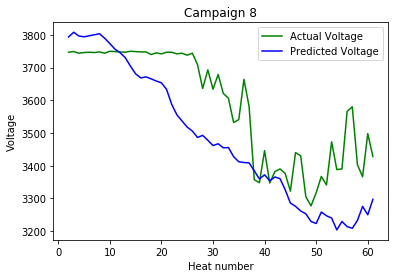

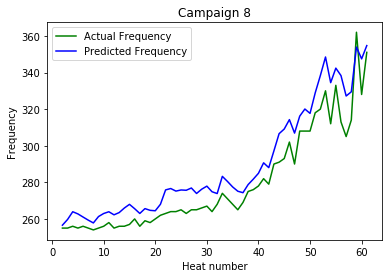

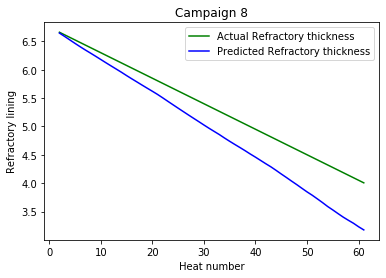

In [21]:
plt.plot(range(2,62),Act[:,0],c='g');
plt.plot(range(2,62),Pred[:,0],c='b');
plt.xlabel('Heat number')
plt.ylabel('Voltage')
plt.title('Campaign 8')
plt.legend(['Actual Voltage','Predicted Voltage'])
plt.show()
plt.plot(range(2,62),Act[:,1],c='g');
plt.plot(range(2,62),Pred[:,1],c='b');
plt.xlabel('Heat number')
plt.ylabel('Frequency')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Campaign 8')
plt.show()
plt.plot(range(2,62),Act[:,2],c='g');
plt.plot(range(2,62),Pred[:,2],c='b');
plt.xlabel('Heat number')
plt.ylabel('Refractory lining')
plt.legend(['Actual Refractory thickness','Predicted Refractory thickness'])
plt.title('Campaign 8')
plt.show()